# Data Pre Processing

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_ta = pd.read_csv('https://raw.githubusercontent.com/mrasyidki/data_pelanggan_abg_new/main/data_pelanggan_abg_new.csv', sep=';', engine='python')

In [ ]:
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168889 entries, 0 to 168888
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   InvoiceNo     168889 non-null  object
 1   InvoiceDate   168889 non-null  object
 2   CustomerID    161256 non-null  object
 3   CustomerName  168886 non-null  object
 4   Mata Uang     168889 non-null  object
 5   Kurs          168889 non-null  int64 
 6   TotalAmount   168889 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 9.0+ MB


In [ ]:
df_ta.isnull().sum()

InvoiceNo          0
InvoiceDate        0
CustomerID      7633
CustomerName       3
Mata Uang          0
Kurs               0
TotalAmount        0
dtype: int64

In [ ]:
df_ta.head()

,InvoiceNo,InvoiceDate,CustomerID,CustomerName,Mata Uang,Kurs,TotalAmount
0,OR-1408-000062,08/02/14,110-P002,Prapti R,IDR,1,1029000
1,OR-1408-000054,08/02/14,110-U002,Udin Tc,IDR,1,1138000
2,OR-1408-000059,08/02/14,110-A006,Ade Jb,IDR,1,1480000
3,OR-1408-000064,08/02/14,110-O002,Ool Jb,IDR,1,1600000
4,OR-1408-000063,08/02/14,110-W002,Warti Kb,IDR,1,2000000


In [ ]:
df = df_ta.dropna(how='any',axis=0)

In [ ]:
df.to_csv(r'C:\Users\megag\Downloads\data_ta_abg.csv', index=False)

In [ ]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,CustomerName,Mata Uang,Kurs,TotalAmount
0,OR-1408-000062,2014-08-02,110-P002,Prapti R,IDR,1,1029000
1,OR-1408-000054,2014-08-02,110-U002,Udin Tc,IDR,1,1138000
2,OR-1408-000059,2014-08-02,110-A006,Ade Jb,IDR,1,1480000
3,OR-1408-000064,2014-08-02,110-O002,Ool Jb,IDR,1,1600000
4,OR-1408-000063,2014-08-02,110-W002,Warti Kb,IDR,1,2000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161256 entries, 0 to 168888
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     161256 non-null  object        
 1   InvoiceDate   161256 non-null  datetime64[ns]
 2   CustomerID    161256 non-null  object        
 3   CustomerName  161256 non-null  object        
 4   Mata Uang     161256 non-null  object        
 5   Kurs          161256 non-null  int64         
 6   TotalAmount   161256 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 9.8+ MB


In [ ]:
df.nunique()

InvoiceNo       161256
InvoiceDate       2580
CustomerID         301
CustomerName       301
Mata Uang            1
Kurs                 1
TotalAmount      10959
dtype: int64

In [ ]:
#Change InvoiceDate data type into datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-9-f2eccc7ef879>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161256 entries, 0 to 168888
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     161256 non-null  object        
 1   InvoiceDate   161256 non-null  datetime64[ns]
 2   CustomerID    161256 non-null  object        
 3   CustomerName  161256 non-null  object        
 4   Mata Uang     161256 non-null  object        
 5   Kurs          161256 non-null  int64         
 6   TotalAmount   161256 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 9.8+ MB


In [ ]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,CustomerName,Mata Uang,Kurs,TotalAmount
0,OR-1408-000062,2014-08-02,110-P002,Prapti R,IDR,1,1029000
1,OR-1408-000054,2014-08-02,110-U002,Udin Tc,IDR,1,1138000
2,OR-1408-000059,2014-08-02,110-A006,Ade Jb,IDR,1,1480000
3,OR-1408-000064,2014-08-02,110-O002,Ool Jb,IDR,1,1600000
4,OR-1408-000063,2014-08-02,110-W002,Warti Kb,IDR,1,2000000


## LRFM Transformation

In [ ]:
#Create Latest_Date variable 2021-10-7 because the latest InvoiceDate is 2011-10-6
Latest_Date = dt.datetime(2021,10,7)

In [ ]:
#Converts to Length attribute
LengthScores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (x.max() - x.min()).days})

#Changes InvoiceDate data type into integer
LengthScores['InvoiceDate'] = LengthScores['InvoiceDate'].astype(int)

#Changes Column Name
LengthScores.rename(columns={'InvoiceDate': 'Length'}, inplace=True)

LengthScores.reset_index().head()

,CustomerID,Length
0,000-A002,488
1,000-H001,536
2,000-M001,98
3,110-0002,476
4,110-A001,2597


In [ ]:
#Converts to Recency attribute
RecencyScores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days})

#Changes InvoiceDate data type into integer
RecencyScores['InvoiceDate'] = RecencyScores['InvoiceDate'].astype(int)

#Changes Column Name
RecencyScores.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)

RecencyScores.reset_index().head()

,CustomerID,Recency
0,000-A002,6
1,000-H001,2
2,000-M001,2
3,110-0002,405
4,110-A001,13


In [ ]:
#Converts to Frequency attribute
FrequencyScores = df.groupby('CustomerID').agg({'InvoiceNo': lambda x: len(x)})

#Changes Column Name
FrequencyScores.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

FrequencyScores.reset_index().head()

,CustomerID,Frequency
0,000-A002,164
1,000-H001,90
2,000-M001,84
3,110-0002,6
4,110-A001,314


In [ ]:
#Converts to Monetary
MonetaryScores = df.groupby('CustomerID').agg({'TotalAmount': lambda x: x.sum()})

#Changes Column Name
MonetaryScores.rename(columns={'TotalAmount': 'Monetary'}, inplace=True)

MonetaryScores.reset_index().head()

,CustomerID,Monetary
0,000-A002,983781000
1,000-H001,175856000
2,000-M001,74834000
3,110-0002,3132000
4,110-A001,1219808000


In [ ]:
from functools import reduce
#Merges LRFM attributes
LRFM = [LengthScores, RecencyScores, FrequencyScores, MonetaryScores]

LRFMScores = reduce(lambda  left,right: pd.merge(left,right,on=['CustomerID'], how='outer'), LRFM)

LRFMScores.reset_index().head()

,CustomerID,Length,Recency,Frequency,Monetary
0,000-A002,488,6,164,983781000
1,000-H001,536,2,90,175856000
2,000-M001,98,2,84,74834000
3,110-0002,476,405,6,3132000
4,110-A001,2597,13,314,1219808000


<ipython-input-18-cfeaf284765b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LRFMScores[column])


Length's: Skew: 0.3520350223945043


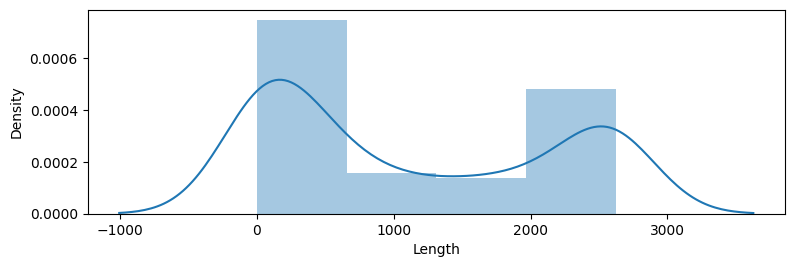

In [ ]:
from scipy import stats
def check_skew(LRFMScores, column):
    skew = stats.skew(LRFMScores[column])
    sns.distplot(LRFMScores[column])
    print("{}'s: Skew: {}".format(column, skew))
    return

plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.ylabel('Density')
check_skew(LRFMScores,'Length')

<ipython-input-18-cfeaf284765b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LRFMScores[column])


Recency's: Skew: 0.795296588197694


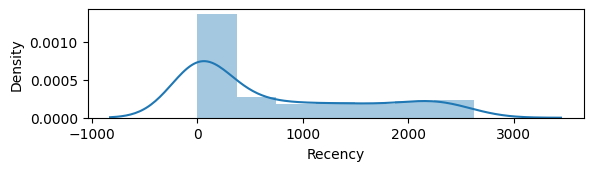

In [ ]:
plt.subplot(3, 1, 1)
plt.ylabel('Density')
check_skew(LRFMScores,'Recency')


<ipython-input-18-cfeaf284765b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LRFMScores[column])


Frequency's: Skew: 1.4164524887389653


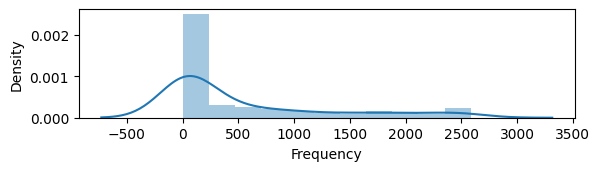

In [ ]:
plt.subplot(3, 1, 1)
plt.ylabel('Density')
check_skew(LRFMScores,'Frequency')


<ipython-input-18-cfeaf284765b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LRFMScores[column])


Monetary's: Skew: 2.969712325589464


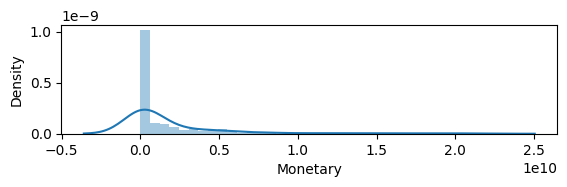

In [ ]:
plt.subplot(3, 1, 1)
plt.ylabel('Density')
check_skew(LRFMScores,'Monetary')

<ipython-input-18-cfeaf284765b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LRFMScores[column])


Length's: Skew: -1.208822950765542


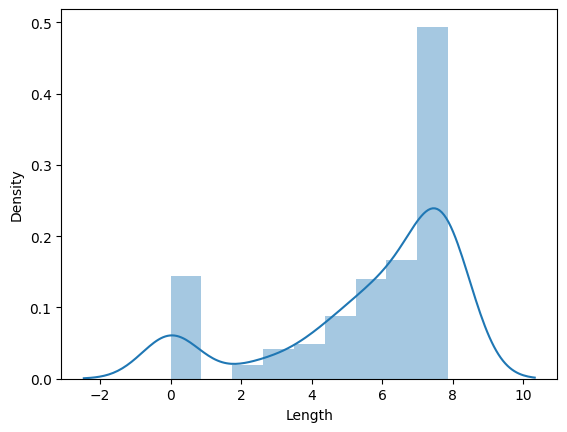

In [ ]:
#Handling zero value
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

LRFMScores['Length'] = [handle_neg_n_zero(x) for x in LRFMScores.Length]
LRFMScores['Recency'] = [handle_neg_n_zero(x) for x in LRFMScores.Recency]
LRFMScores['Monetary'] = [handle_neg_n_zero(x) for x in LRFMScores.Monetary]

#Log transformation to normalize the data distribution
Log_Tfd_Data = LRFMScores[['Length','Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

check_skew(Log_Tfd_Data,'Length')

In [ ]:
LRFM_log = pd.DataFrame()
LRFM_log['Recency_1'] = np.log(LRFMScores['Recency'])

In [ ]:
LRFM_log['Recency_2'] = np.log(LRFM_log['Recency_1'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ipython-input-18-cfeaf284765b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LRFMScores[column])


Recency_1's: Skew: -0.3205984421846695


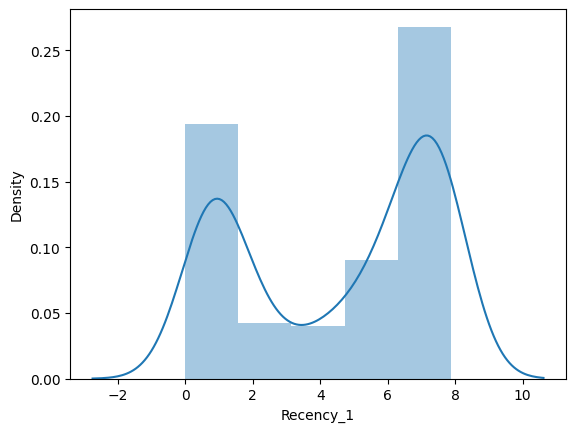

In [ ]:
check_skew(LRFM_log,'Recency_1')

In [ ]:
LRFM_log['Frequency_1'] = np.log(LRFMScores['Frequency'])

In [ ]:
LRFM_log['Frequency_2'] = np.log(LRFM_log['Frequency_1'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ipython-input-18-cfeaf284765b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LRFMScores[column])


Frequency_1's: Skew: -0.28064071841861776


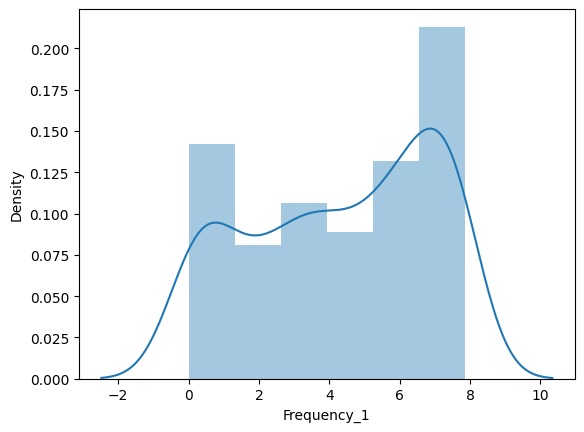

In [ ]:
check_skew(LRFM_log,'Frequency_1')

In [ ]:
LRFM_log['Monetary_1'] = np.log(LRFMScores['Monetary'])

In [ ]:
LRFM_log['Monetary_2'] = np.log(LRFM_log['Monetary_1'])

<ipython-input-18-cfeaf284765b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LRFMScores[column])


Monetary_1's: Skew: -0.32039122656767416


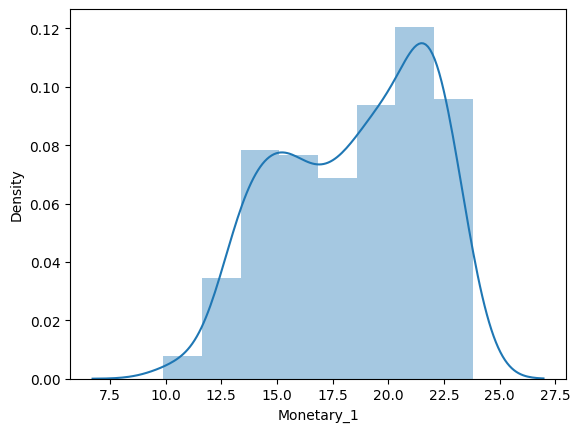

In [ ]:
check_skew(LRFM_log,'Monetary_1')

<ipython-input-18-cfeaf284765b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LRFMScores[column])


Monetary_2's: Skew: -0.5952956902173867


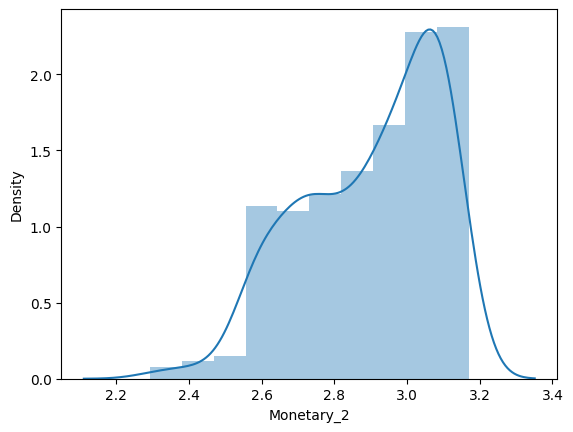

In [ ]:
check_skew(LRFM_log,'Monetary_2')

In [ ]:
LRFM_log.head()

,Recency_1,Recency_2,Frequency_1,Frequency_2,Monetary_1,Monetary_2
CustomerID,,,,,,
000-A002,1.791759,0.583198,5.099866,1.629214,20.706914,3.030468
000-H001,0.693147,-0.366513,4.499810,1.504035,18.985176,2.943658
000-M001,0.693147,-0.366513,4.430817,1.488584,18.130783,2.897611
110-0002,6.003887,1.792407,1.791759,0.583198,14.957182,2.705192
110-A001,2.564949,0.941939,5.749393,1.749094,20.921959,3.040799


In [ ]:
LRFM_new = pd.merge(LRFMScores['Length'], LRFM_log, on=['CustomerID'])
LRFM_new.rename(columns={'Recency_1': 'Recency', 'Frequency_1': 'Frequency','Monetary_1': 'Monetary'}, inplace=True)
LRFM_new = LRFM_new.drop(['Recency_2','Frequency_2','Monetary_2'], axis = 1)
LRFM_new.head()

,Length,Recency,Frequency,Monetary
CustomerID,,,,
000-A002,488,1.791759,5.099866,20.706914
000-H001,536,0.693147,4.499810,18.985176
000-M001,98,0.693147,4.430817,18.130783
110-0002,476,6.003887,1.791759,14.957182
110-A001,2597,2.564949,5.749393,20.921959


## Normalization of LRFM attributes

In [ ]:
def normalize(LRFMScores):
  LRFM_norm = LRFM_new.copy()
  for feature_name in LRFM_new.columns:
    max_value = LRFM_new[feature_name].max()
    min_value = LRFM_new[feature_name].min()
    LRFM_norm[feature_name]=(LRFM_new[feature_name]-min_value)/(max_value - min_value)
  return LRFM_norm
LRFMNormal = normalize(LRFM_new)
LRFMNormal.head()

,Length,Recency,Frequency,Monetary
CustomerID,,,,
000-A002,0.185807,0.227643,0.649014,0.778055
000-H001,0.204121,0.088064,0.572650,0.654057
000-M001,0.037009,0.088064,0.563870,0.592524
110-0002,0.181229,0.762793,0.228021,0.363964
110-A001,0.990462,0.325876,0.731673,0.793543


In [ ]:
#Reverse Recency value
recency = LRFMNormal['Recency']
max_value = 1
def R_new(recency):
  return max_value - recency
LRFMNormal['Recency'] = LRFMNormal['Recency'].apply(R_new)

In [ ]:
LRFMNormal.head()

,Length,Recency,Frequency,Monetary
CustomerID,,,,
000-A002,0.185807,0.772357,0.649014,0.778055
000-H001,0.204121,0.911936,0.572650,0.654057
000-M001,0.037009,0.911936,0.563870,0.592524
110-0002,0.181229,0.237207,0.228021,0.363964
110-A001,0.990462,0.674124,0.731673,0.793543


# Data Processing

## K-Value

In [ ]:
import sklearn.cluster as cluster

K=range(1,12)
sse = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(LRFMNormal)
    sse_iter = kmeans.inertia_
    sse.append(sse_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
#SSE Value for every cluster
sse_value = pd.DataFrame({'number_of_clusters' : K, 'SSE' : sse})
sse_value = sse_value.round(3)
sse_value

,number_of_clusters,SSE
0,1,137.643
1,2,50.306
2,3,34.748
3,4,25.465
4,5,18.500
5,6,15.483
6,7,13.486
7,8,11.944
8,9,11.034
9,10,9.930


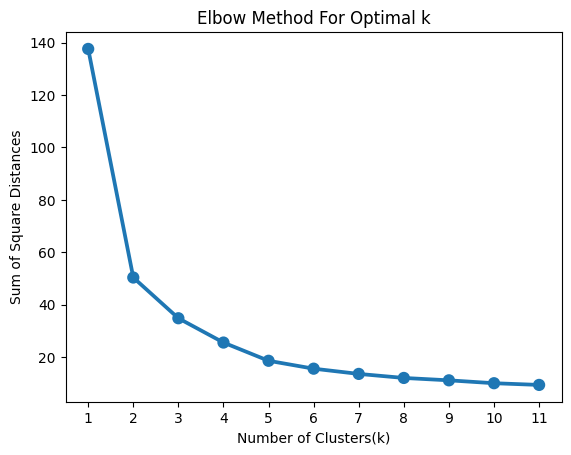

In [ ]:
#K-Value using elbow method
sns.pointplot(x = 'number_of_clusters', y = 'SSE', data = sse_value)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(LRFMNormal).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(LRFMNormal,labels,metric="euclidean",sample_size=1000,random_state=200)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 2 is 0.5325725235954606
Silhouette score for k(clusters) = 3 is 0.44484031110695177
Silhouette score for k(clusters) = 4 is 0.4640401803581184
Silhouette score for k(clusters) = 5 is 0.4851519310563087
Silhouette score for k(clusters) = 6 is 0.49493469372102683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 7 is 0.4623761850860349


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 8 is 0.4527283351953553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 9 is 0.422334174452345


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 10 is 0.41635282323533424


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 11 is 0.419052183834443


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 12 is 0.35697550751277674


## K-Means Clustering

In [ ]:
KMean_clust = cluster.KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(LRFMNormal)


LRFMNormal['Cluster'] = KMean_clust.labels_
LRFMNormal['Cluster'] = LRFMNormal['Cluster'].replace({0:"SA", 1:"SB"})
LRFMNormal.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Length,Recency,Frequency,Monetary,Cluster
CustomerID,,,,,
000-A002,0.185807,0.772357,0.649014,0.778055,SA
000-H001,0.204121,0.911936,0.572650,0.654057,SA
000-M001,0.037009,0.911936,0.563870,0.592524,SB
110-0002,0.181229,0.237207,0.228021,0.363964,SB
110-A001,0.990462,0.674124,0.731673,0.793543,SA


In [ ]:
LRFMNormal.tail()

,Length,Recency,Frequency,Monetary,Cluster
CustomerID,,,,,
110-Y015,0.000000,0.037328,0.000000,0.323349,SB
110-Y016,0.225486,0.097943,0.600481,0.760895,SB
110-Y017,0.000000,0.174012,0.088211,0.225345,SB
110-Y018,0.050744,0.469645,0.514523,0.657409,SB
110-Y019,0.045403,0.752773,0.293029,0.462988,SB


## CLV




In [ ]:
LRFMNormal['CLV'] = (LRFMNormal['Length'] * 0.124) + (LRFMNormal['Recency'] * 0.136) + (LRFMNormal['Frequency'] * 0.511) + (LRFMNormal['Monetary'] * 0.229)
#LRFM_new = LRFM_new.drop(['Recency_2','Frequency_2','Monetary_2'], axis = 1)
LRFMNormal = LRFMNormal.round(3)
LRFMNormal.head()

,Length,Recency,Frequency,Monetary,Cluster,CLV
CustomerID,,,,,,
000-A002,0.186,0.772,0.649,0.778,SA,0.638
000-H001,0.204,0.912,0.573,0.654,SA,0.592
000-M001,0.037,0.912,0.564,0.593,SB,0.552
110-0002,0.181,0.237,0.228,0.364,SB,0.255
110-A001,0.990,0.674,0.732,0.794,SA,0.770


In [ ]:
LRFMNormal.mean()

<ipython-input-45-3904e4d8067c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  LRFMNormal.mean()


Length       0.428774
Recency      0.420146
Frequency    0.551468
Monetary     0.619007
CLV          0.533860
dtype: float64

## CLV for each Cluster

In [ ]:
options = ["SA"]

# selecting rows based on condition
CLV_1 = LRFMNormal.loc[LRFMNormal['Cluster'].isin(options)]

CLV_1.head()

,Length,Recency,Frequency,Monetary,Cluster,CLV
CustomerID,,,,,,
000-A002,0.186,0.772,0.649,0.778,SA,0.638
000-H001,0.204,0.912,0.573,0.654,SA,0.592
110-A001,0.990,0.674,0.732,0.794,SA,0.770
110-A003,0.999,0.824,0.921,0.882,SA,0.909
110-A004,0.545,0.100,0.903,0.823,SA,0.731


In [ ]:
CLV_1.mean()

<ipython-input-47-d90a1c43eddf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  CLV_1.mean()


Length       0.795133
Recency      0.747207
Frequency    0.829667
Monetary     0.814541
CLV          0.810681
dtype: float64

In [ ]:
options = ["SB"]

# selecting rows based on condition
CLV_2 = LRFMNormal.loc[LRFMNormal['Cluster'].isin(options)]

CLV_2.head()

,Length,Recency,Frequency,Monetary,Cluster,CLV
CustomerID,,,,,,
000-M001,0.037,0.912,0.564,0.593,SB,0.552
110-0002,0.181,0.237,0.228,0.364,SB,0.255
110-A002,0.540,0.099,0.600,0.693,SB,0.546
110-A006,0.201,0.028,0.711,0.677,SB,0.547
110-A010,0.000,0.000,0.088,0.281,SB,0.110


In [ ]:
CLV_2.mean()

<ipython-input-49-1e83eee122a6>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  CLV_2.mean()


Length       0.130831
Recency      0.154163
Frequency    0.325223
Monetary     0.459988
CLV          0.308735
dtype: float64

# Analysis

## Cluster Analysis

In [ ]:

klaster_df = pd.merge(LRFMScores, LRFMNormal['Cluster'], on="CustomerID")
klaster_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 000-A002 to 110-Y019
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Length     301 non-null    int64 
 1   Recency    301 non-null    int64 
 2   Frequency  301 non-null    int64 
 3   Monetary   301 non-null    int64 
 4   Cluster    301 non-null    object
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [ ]:
klaster_df.head()

,Length,Recency,Frequency,Monetary,Cluster
CustomerID,,,,,
000-A002,488,6,164,983781000,SA
000-H001,536,2,90,175856000,SA
000-M001,98,2,84,74834000,SB
110-0002,476,405,6,3132000,SB
110-A001,2597,13,314,1219808000,SA


In [ ]:
mean_df = klaster_df[["Length","Recency","Frequency"]].mean()
print(mean_df)

Length       1124.807309
Recency       742.754153
Frequency     535.734219
dtype: float64


In [ ]:
n = klaster_df["Monetary"].mean()
format(n, 'f')

'1910134166.235880'

In [ ]:
klaster_df.min()

Length           1
Recency          1
Frequency        1
Monetary     20000
Cluster         SA
dtype: object

In [ ]:
klaster_df.max()

Length              2622
Recency             2620
Frequency           2586
Monetary     21442718000
Cluster               SB
dtype: object

In [ ]:
options = ["SA"]

# selecting rows based on condition
klaster_1 = klaster_df.loc[klaster_df['Cluster'].isin(options)]

klaster_1.head()

,Length,Recency,Frequency,Monetary,Cluster
CustomerID,,,,,
000-A002,488,6,164,983781000,SA
000-H001,536,2,90,175856000,SA
110-A001,2597,13,314,1219808000,SA
110-A003,2619,4,1393,4141853600,SA
110-A004,1430,1191,1210,1829372800,SA


In [ ]:
mean_df1 = klaster_1[["Length","Recency","Frequency"]].mean()
print(mean_df1)

Length       2084.970370
Recency        78.333333
Frequency    1112.155556
dtype: float64


In [ ]:
n1 = klaster_1["Monetary"].mean()
format(n1, 'f')

'4096327107.118518'

In [ ]:
klaster_1.min()

Length           243
Recency            1
Frequency         19
Monetary     3322000
Cluster           SA
dtype: object

In [ ]:
klaster_1.max()

Length              2622
Recency             1355
Frequency           2586
Monetary     21442718000
Cluster               SA
dtype: object

In [ ]:
options = ["SB"]

# selecting rows based on condition
klaster_2 = klaster_df.loc[klaster_df['Cluster'].isin(options)]

klaster_2.head()

,Length,Recency,Frequency,Monetary,Cluster
CustomerID,,,,,
000-M001,98,2,84,74834000,SB
110-0002,476,405,6,3132000,SB
110-A002,1416,1204,112,302894000,SB
110-A006,528,2095,266,243183000,SB
110-A010,1,2620,2,994400,SB


In [ ]:
mean_df2 = klaster_2[["Length","Recency","Frequency"]].mean()
print(mean_df2)

Length        343.951807
Recency      1283.096386
Frequency      66.957831
dtype: float64


In [ ]:
n2 = klaster_2["Monetary"].mean()
format(n2, 'f')

'132206172.144578'

In [ ]:
klaster_2.min()

Length           1
Recency          2
Frequency        1
Monetary     20000
Cluster         SB
dtype: object

In [ ]:
klaster_2.max()

Length             1868
Recency            2620
Frequency           815
Monetary     2136168000
Cluster              SB
dtype: object

In [ ]:
LRFMNormal["Cluster"].value_counts()

SB    166
SA    135
Name: Cluster, dtype: int64

In [ ]:
LRFMNormal["Cluster"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

SB    55.1%
SA    44.9%
Name: Cluster, dtype: object

## LRFM attributes analysis

<Axes: xlabel='Cluster', ylabel='Length'>

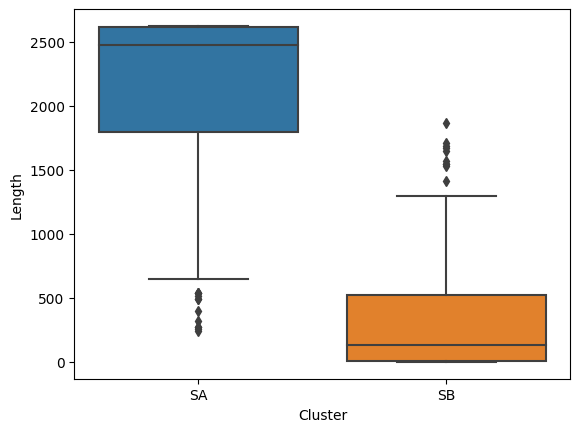

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#create boxplot by group
sns.boxplot(x='Cluster', y='Length', data=klaster_df)

<Axes: xlabel='Cluster', ylabel='Recency'>

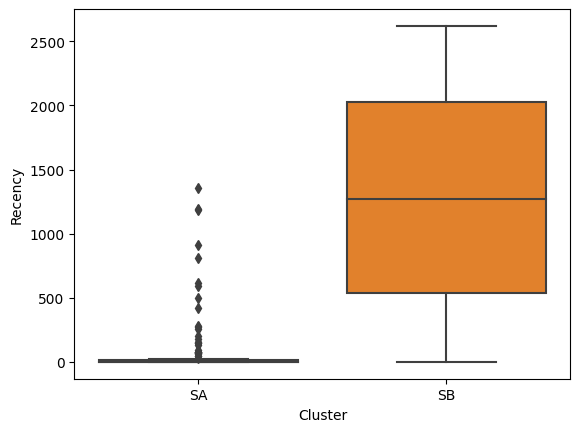

In [ ]:
sns.boxplot(x='Cluster', y='Recency', data=klaster_df)

<Axes: xlabel='Cluster', ylabel='Frequency'>

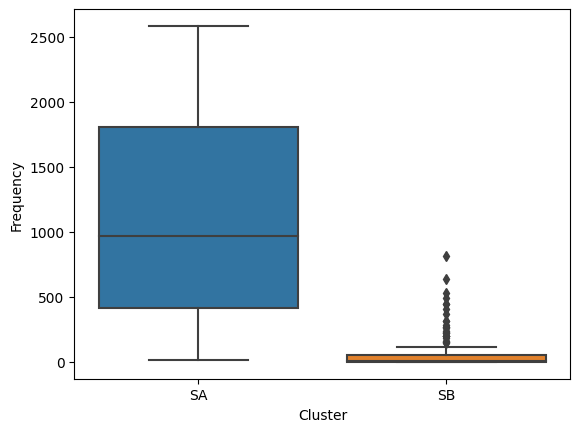

In [ ]:
sns.boxplot(x='Cluster', y='Frequency', data=klaster_df)

<Axes: xlabel='Cluster', ylabel='Monetary'>

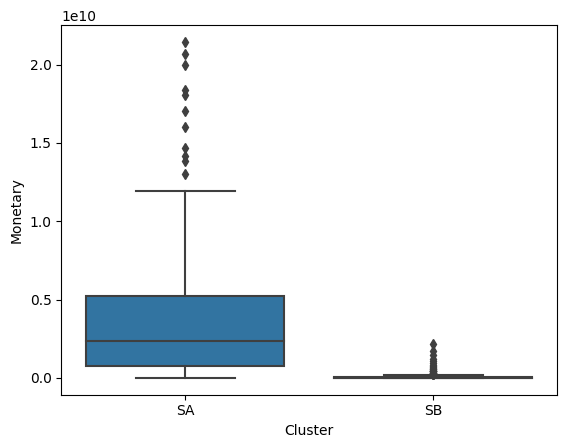

In [ ]:
sns.boxplot(x='Cluster', y='Monetary', data=klaster_df)

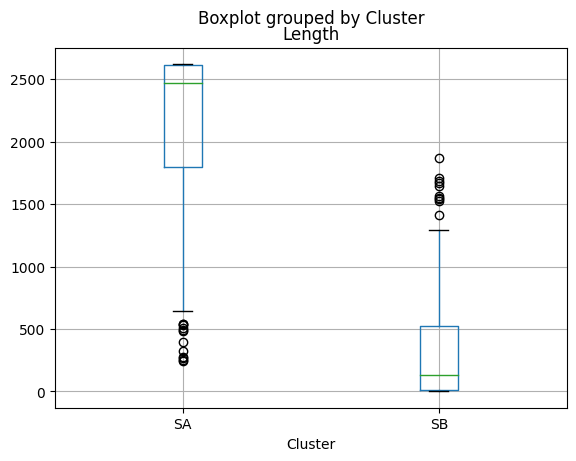

In [ ]:
boxplot = klaster_df.boxplot(column=['Length'], by='Cluster')

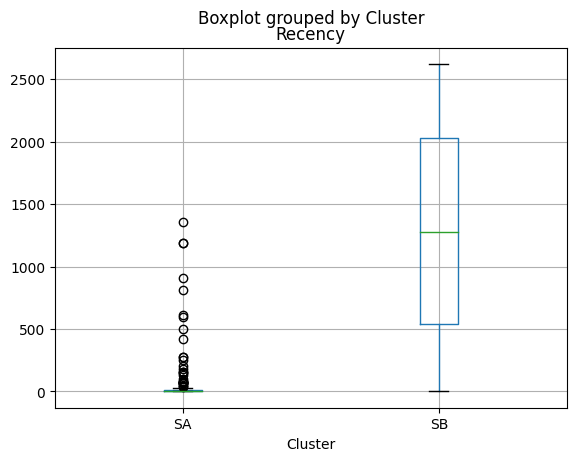

In [ ]:
boxplot = klaster_df.boxplot(column=['Recency'], by='Cluster')

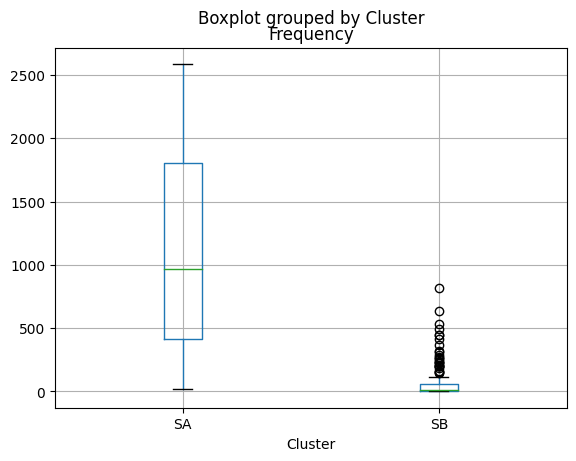

In [ ]:
boxplot = klaster_df.boxplot(column=['Frequency'], by='Cluster')

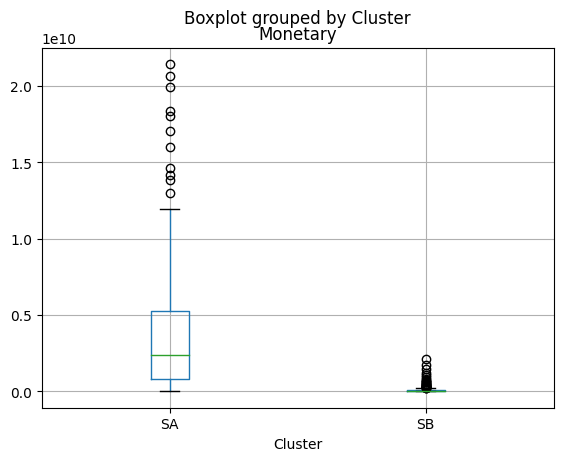

In [ ]:
boxplot = klaster_df.boxplot(column=['Monetary'], by='Cluster')

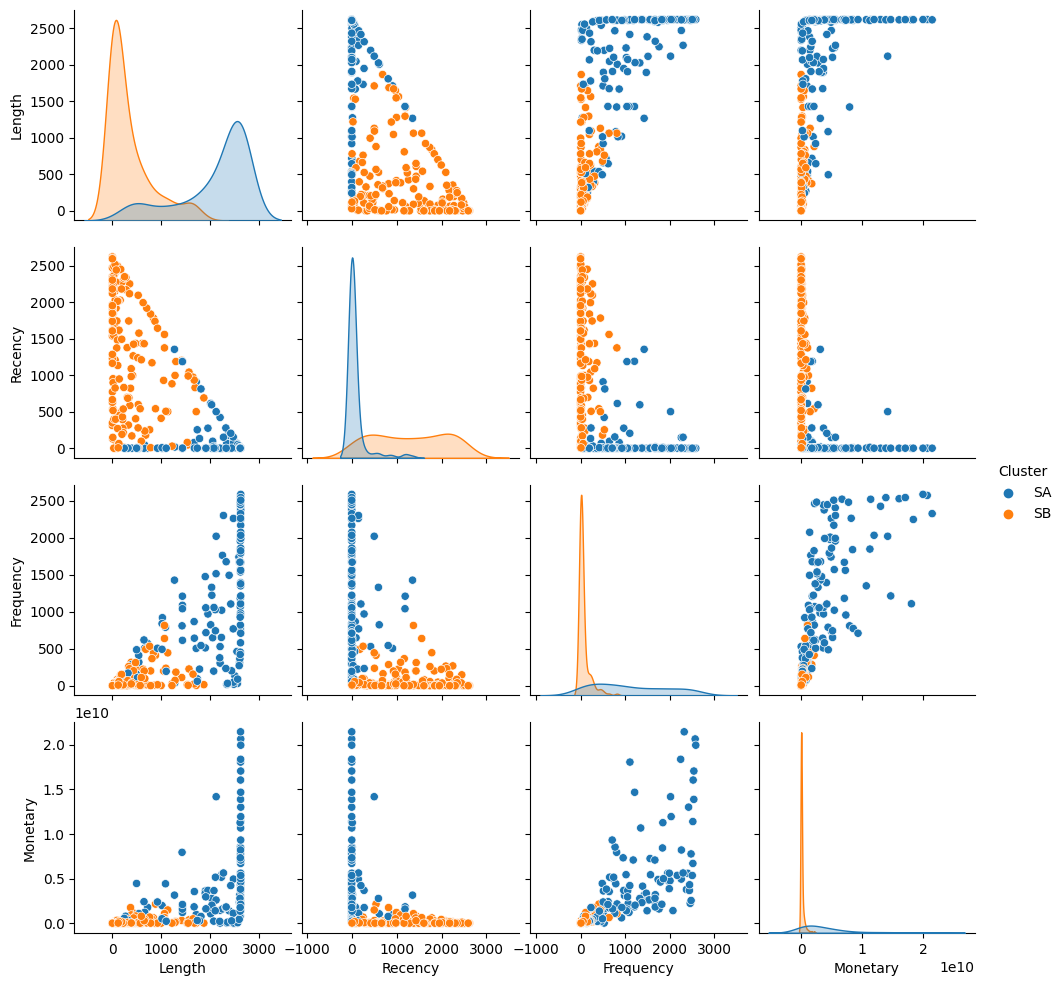

<Figure size 200x200 with 0 Axes>

In [ ]:
# importing packages
import seaborn
import matplotlib.pyplot as plt

# pairplot with hue sex
seaborn.pairplot(klaster_df, hue ='Cluster')
# to show
plt.figure(figsize=(2, 2))
plt.show()

# Appendix

In [ ]:
display(klaster_df)

,Length,Recency,Frequency,Monetary,Cluster
CustomerID,,,,,
000-A002,488,6,164,983781000,SA
000-H001,536,2,90,175856000,SA
000-M001,98,2,84,74834000,SB
110-0002,476,405,6,3132000,SB
110-A001,2597,13,314,1219808000,SA
...,...,...,...,...,...
110-Y015,1,1953,1,1782000,SB
110-Y016,592,1212,112,775206000,SB
110-Y017,1,666,2,457000,SB


In [ ]:
display(df_ta)

,InvoiceNo,InvoiceDate,CustomerID,CustomerName,Mata Uang,Kurs,TotalAmount
0,OR-1408-000062,08/02/14,110-P002,Prapti R,IDR,1,1029000
1,OR-1408-000054,08/02/14,110-U002,Udin Tc,IDR,1,1138000
2,OR-1408-000059,08/02/14,110-A006,Ade Jb,IDR,1,1480000
3,OR-1408-000064,08/02/14,110-O002,Ool Jb,IDR,1,1600000
4,OR-1408-000063,08/02/14,110-W002,Warti Kb,IDR,1,2000000
...,...,...,...,...,...,...,...
168884,OR-2110-169094,10/06/21,110-A047,ahmad jb,IDR,1,1000000
168885,OR-2110-169095,10/06/21,110-A007,Aip Jb,IDR,1,1200000
168886,OR-2110-169098,10/06/21,110-O002,Ool Jb,IDR,1,1900000
168887,OR-2110-169097,10/06/21,110-B020,Budi Gb,IDR,1,2000000
